In [2]:
import pandas as pd
df = pd.read_csv('C:/Work/Orange3/06/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


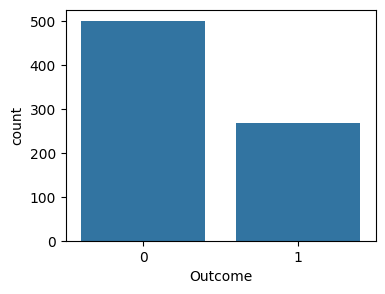

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,3))
sns.countplot(x='Outcome', data=df)
plt.show()

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
print("Number of rows with 0 values for each variable")
for col in df.columns:
    missing_rows=df.loc[df[col]==0].shape[0]
    print(col+":", missing_rows)

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


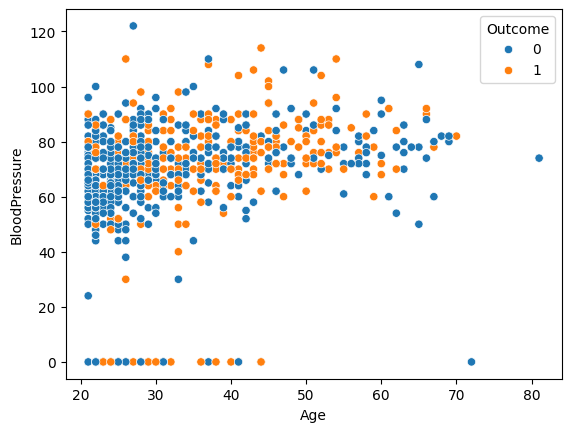

In [7]:
sns.scatterplot(x="Age", y="BloodPressure", hue="Outcome", data=df)
plt.show()

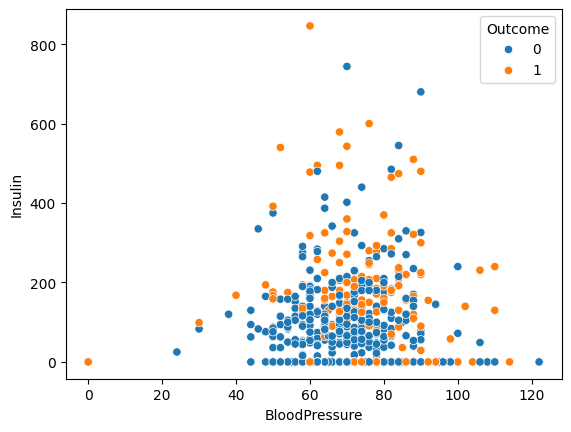

In [8]:
sns.scatterplot(x='BloodPressure', y='Insulin', hue='Outcome', data=df)
plt.show()

<Axes: >

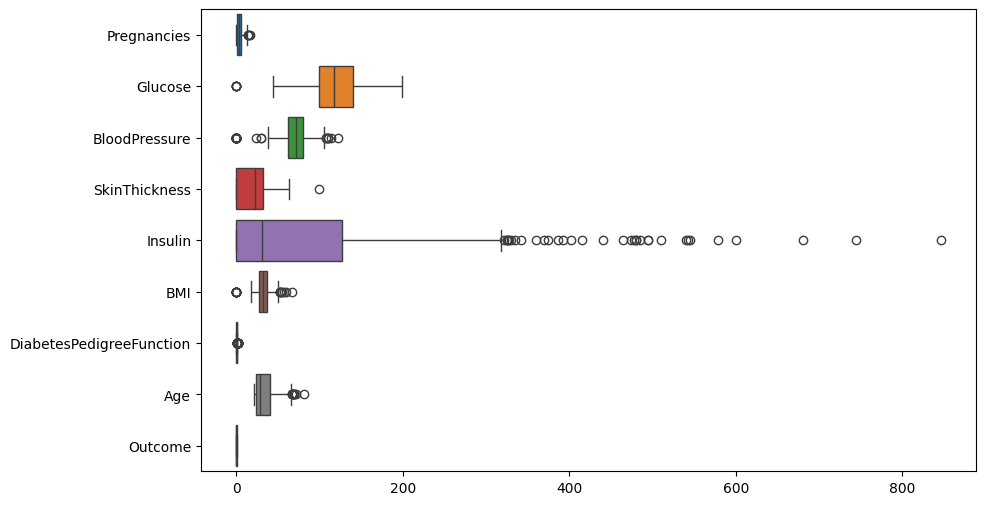

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient='h')

In [10]:
Preg_range=(df.Pregnancies>=0)&(df.Pregnancies<=13.5)
Gluc_range=(df.Glucose>=36.75)&(df.Glucose<=202.75)
Bloo_range=(df.BloodPressure>=35)&(df.BloodPressure<=107)
Skin_range=(df.SkinThickness>=1)&(df.SkinThickness<=80)
Insu_range=(df.Insulin>=1)&(df.Insulin<=318.75)
BMI_range=(df.BMI>=13.35)&(df.BMI<=50.55)
diab_range=(df.DiabetesPedigreeFunction>=0)&(df.DiabetesPedigreeFunction<=1.23)
Age_range=(df.Age>=21)&(df.Age<=65.5)
df2=df.loc[Preg_range&Gluc_range&Bloo_range&Skin_range&Insu_range&BMI_range&diab_range&Age_range,:]
df2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
19,1,115,70,30,96,34.6,0.529,32,1
...,...,...,...,...,...,...,...,...,...
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [11]:
X = df2.drop('Outcome', axis = 1)
y = df2['Outcome']

In [12]:
print("특징 모양: ", X.shape)
print("타깃 모양: ", y.shape)

특징 모양:  (333, 8)
타깃 모양:  (333,)


In [13]:
# 최소-최대 정규화하기
X_scaled = (X-X.min())/(X.max()-X.min())
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,0.076923,0.232394,0.411765,0.301887,0.260726,0.314286,0.071993,0.000000
6,0.230769,0.154930,0.176471,0.471698,0.240924,0.406349,0.143108,0.119048
14,0.384615,0.774648,0.500000,0.226415,0.528053,0.241270,0.440737,0.714286
16,0.000000,0.436620,0.676471,0.754717,0.709571,0.876190,0.409131,0.238095
19,0.076923,0.415493,0.470588,0.433962,0.267327,0.520635,0.389816,0.261905


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y)

In [15]:
print("훈련 데이터: ", X_train.shape, y_train.shape)
print("테스트 데이터: ", X_test.shape, y_test.shape)

훈련 데이터:  (233, 8) (233,)
테스트 데이터:  (100, 8) (100,)


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train) # 훈련 데이터로 학습

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
import numpy as np
w=model.coef_
b=model.intercept_
print("w= ", np.round(w, 2))
print("b= ", np.round(b, 2))

w=  [[0.86 3.2  0.62 0.53 0.88 0.49 1.23 1.31]]
b=  [-4.61]


In [18]:
print("훈련 데이터로 학습한 모델 분류 정확도: ", model.score(X_train, y_train))

훈련 데이터로 학습한 모델 분류 정확도:  0.8240343347639485


In [19]:
print("테스트 데이터를 이용한 모델 성능 평가: ", model.score(X_test, y_test))

테스트 데이터를 이용한 모델 성능 평가:  0.74


In [20]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[5:10])
print(y_test[5:10])

[0 0 0 0 0]
543    0
688    0
199    1
19     1
85     0
Name: Outcome, dtype: int64


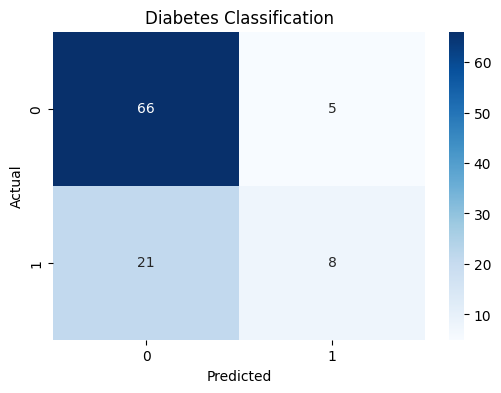

In [22]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))

conf=confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, cmap='Blues', fmt='g')

plt.title("Diabetes Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
y.value_counts()

Outcome
0    238
1     95
Name: count, dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X,y)

In [25]:
y2.value_counts()

Outcome
0    238
1    238
Name: count, dtype: int64

In [31]:
X2_scaled= (X2-X2.min())/(X2.max()-X2.min())
X2_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.076923,0.232394,0.411765,0.301887,0.260726,0.314286,0.071993,0.000000
1,0.230769,0.154930,0.176471,0.471698,0.240924,0.406349,0.143108,0.119048
2,0.384615,0.774648,0.500000,0.226415,0.528053,0.241270,0.440737,0.714286
3,0.000000,0.436620,0.676471,0.754717,0.709571,0.876190,0.409131,0.238095
4,0.076923,0.415493,0.470588,0.433962,0.267327,0.520635,0.389816,0.261905


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X2_scaled, y2, test_size=0.3, stratify=y2)

In [44]:
model2 = LogisticRegression( solver='lbfgs', max_iter=1000, random_state=42)
model2.fit(X_train,y_train)

print("개선된 모델 분류 정확도 : ", model2.score(X_train, y_train))

개선된 모델 분류 정확도 :  0.7897897897897898


In [45]:
from sklearn import metrics
y_pred2 = model2.predict(X_test)
print("개선된 모델 성능 평가: ", metrics.accuracy_score(y_test, y_pred2))

개선된 모델 성능 평가:  0.8041958041958042


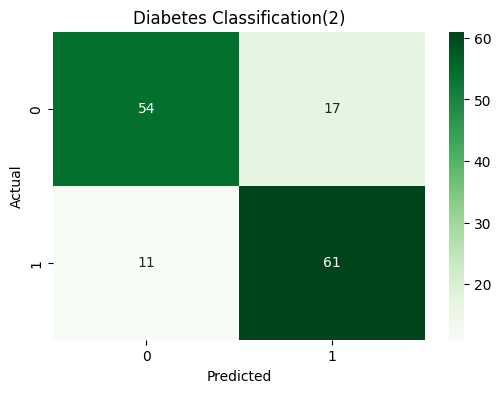

In [46]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 4))
conf = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf, annot=True, cmap="Greens", fmt="g")
plt.title("Diabetes Classification(2)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [47]:
df_new = pd.read_csv('C:/Work/Orange3/오렌지3예제파일/6장/new_diabetes.csv')
df_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,168,74,30,100,38.0,0.537,34
1,4,129,86,20,270,35.1,0.231,23
2,7,155,54,35,180,30.5,0.588,40
3,2,75,64,25,50,29.7,0.370,33
4,1,99,65,16,55,23.6,0.666,27


In [48]:
df_new_scaled = (df_new-X2.min())/(X2.max()-X2.min())
df_new_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.769231,0.788732,0.529412,0.433962,0.280528,0.628571,0.396839,0.309524
1,0.307692,0.514085,0.705882,0.245283,0.841584,0.536508,0.128183,0.047619
2,0.538462,0.697183,0.235294,0.528302,0.544554,0.390476,0.441615,0.452381
3,0.153846,0.133803,0.382353,0.339623,0.115512,0.365079,0.250219,0.285714
4,0.076923,0.302817,0.397059,0.169811,0.132013,0.171429,0.510097,0.142857


In [49]:
print(model2.predict(df_new_scaled))

[1 0 1 0 0]
